<a href="https://colab.research.google.com/github/smlra-kjsce/Generative-AI/blob/main/RNNs_and_LSTMs/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score,roc_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM
import re
from IPython.display import display
import os
import string
import time
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
random.seed(10)

In [7]:
num_words = 5000

( X_train , y_train ),( X_test , y_test ) = imdb.load_data(num_words = 5000)

In [8]:
sequence_length = 300

batch_size = 128

X_train_seq = pad_sequences( X_train, maxlen = sequence_length)

X_test_seq = pad_sequences( X_test, maxlen = sequence_length)

In [9]:
encoder = LabelEncoder()

encoder.fit(y_train)

y_train_transformed = encoder.transform(y_train).reshape(-1,1)

y_test_transformed = encoder.transform(y_test).reshape(-1,1)

In [10]:
model = Sequential()
e = Embedding( num_words , 10 , input_length = sequence_length )
model.add(e)

model.add(LSTM( 128 , dropout = 0.25, recurrent_dropout = 0.25))

model.add(Dense(1, activation = 'sigmoid' ))

model.summary()

model.compile( optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'] )

early_stopper = EarlyStopping( monitor = 'val_acc' , min_delta = 0.0005, patience = 3 )

reduce_lr = ReduceLROnPlateau( monitor = 'val_loss' , patience = 2 , cooldown = 0)

callbacks = [ reduce_lr , early_stopper]

train_history = model.fit( X_train_seq , y_train_transformed , batch_size = batch_size, epochs = 5,validation_split = 0.1 , verbose = 1 , callbacks = callbacks)

score = model.evaluate( X_test_seq , y_test_transformed , batch_size = batch_size)

print( "Accuracy: {:0.4}".format( score[1] ))

print( "Loss:", score[0] )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 10)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 128)               71168     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 121,297
Trainable params: 121,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
176/176 [==============================] - ETA: 0s - loss: 0.6692 - accuracy: 0.5892

176/176 [==============================] - 291s 2s/step - loss: 0.6692 - accuracy: 0.5892 - val_loss: 0.6047 - val_accuracy: 0.7204 - lr: 0.0010
Epoch 2/5
176/176 [==============================] - ETA: 0s - loss: 0.4123 - accuracy: 0.8169

176/176 [==============================] - 288s 2s/step - loss: 0.4123 - accuracy: 0.8169 - val_loss: 0.3260 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 3/5
176/176 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.8873

176/176 [==============================] - 290s 2s/step - loss: 0.2821 - accuracy: 0.8873 - val_loss: 0.3014 - val_accuracy: 0.8820 - lr: 0.0010
Epoch 4/5
176/176 [==============================] - ETA: 0s - loss: 0.2468 - accuracy: 0.9023

176/176 [==============================] - 289s 2s/step - loss: 0.2468 - accuracy: 0.9023 - val_loss: 0.2995 - val_accuracy: 0.8796 - lr: 0.0010
Epoch 5/5
176/176 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.9120

196/196 [==============================] - 64s 327ms/step - loss: 0.3107 - accuracy: 0.8671
Accuracy: 0.8671
Loss: 0.31070151925086975


In [11]:
y_pred = model.predict( X_test_seq )

782/782 [==============================] - 65s 83ms/step


In [14]:
print(' Accuracy: {:0.3}'.format(100*accuracy_score(y_test_transformed, 1 * (y_pred > 0.5))) )

print(' f1 score: {:0.3}'.format( 100*f1_score( y_test_transformed , 1 * ( y_pred > 0.5))))

print(' ROC AUC: {:0.3}'.format( roc_auc_score( y_test_transformed , y_pred)) )

print( classification_report( y_test_transformed , 1 * ( y_pred > 0.5 ),digits = 3) )

 Accuracy: 86.7
 f1 score: 86.5
 ROC AUC: 0.942
              precision    recall  f1-score   support

           0      0.855     0.884     0.869     12500
           1      0.880     0.850     0.865     12500

    accuracy                          0.867     25000
   macro avg      0.868     0.867     0.867     25000
weighted avg      0.868     0.867     0.867     25000



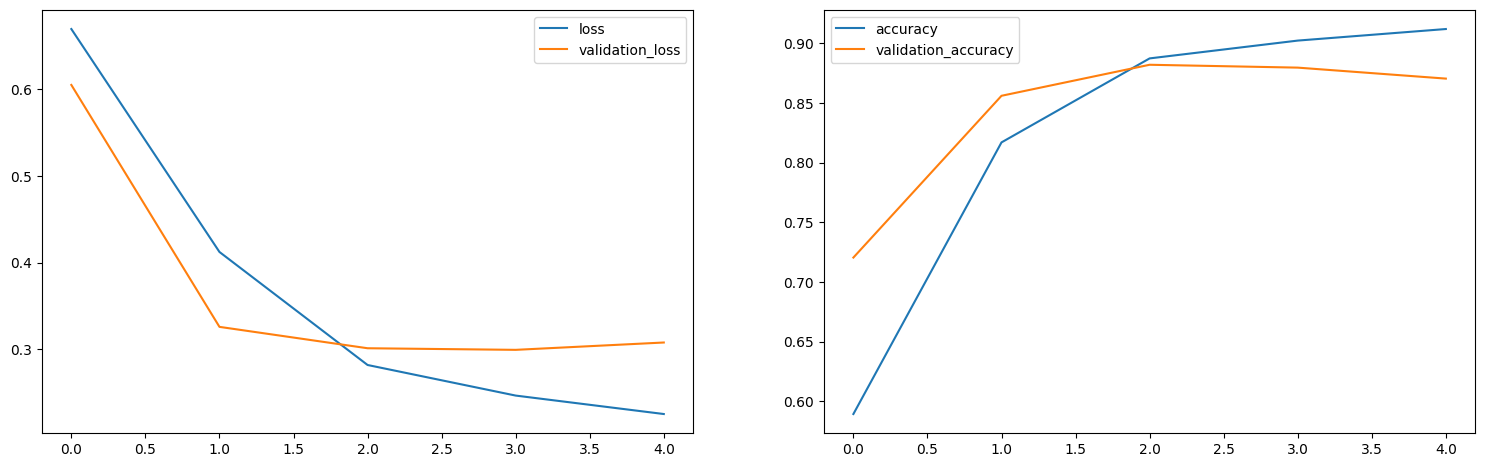

In [17]:
loss = train_history.history['loss']

validation_loss = train_history.history['val_loss']

accuracy = train_history.history['accuracy']

val_accuracy = train_history.history['val_accuracy']

fig = plt.gcf()

fig.set_size_inches(18.5, 5.5)

plt.subplot(1,2,1)

plt.plot(loss)

plt.plot(validation_loss)

plt.legend(['loss', 'validation_loss'])

plt.subplot(1,2,2)

plt.plot(accuracy)

plt.plot(val_accuracy)

plt.legend(['accuracy', 'validation_accuracy'])

plt.show()